## Shree Ram

#### Analyze Amazon sales data to check the buyers preferred choice in the sales


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Amazon Sale Report.csv')

In [4]:
df.shape

(128976, 21)

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [8]:
#drop unrelated/blank columns
df.drop(['New','PendingS'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [10]:
# checking null value 
df.isna()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [11]:
s = df.isnull().sum()

In [12]:
s[s>0]

currency             7800
Amount               7800
ship-city              35
ship-state             35
ship-postal-code       35
ship-country           35
fulfilled-by        89713
dtype: int64

In [13]:
# sum will give total values of null values
s = pd.isnull(df).sum()

In [14]:
s[s>0]

currency             7800
Amount               7800
ship-city              35
ship-state             35
ship-postal-code       35
ship-country           35
fulfilled-by        89713
dtype: int64

In [15]:
df.shape

(128976, 19)

In [16]:
#drop null values
df.dropna(inplace=True)

In [17]:
df.shape

(37514, 19)

In [18]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [19]:
# change data type
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [20]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int32')

In [21]:
df['Date'].dtype

dtype('O')

In [22]:
df['Date']

0           04-30-22
1           04-30-22
3           04-30-22
7           04-30-22
12          04-30-22
             ...    
128875    06-01-2022
128876    06-01-2022
128888      05-31-22
128891      05-31-22
128892      05-31-22
Name: Date, Length: 37514, dtype: object

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['Date'].dtype

dtype('<M8[ns]')

In [25]:
df['Date']

0        2022-04-30
1        2022-04-30
3        2022-04-30
7        2022-04-30
12       2022-04-30
            ...    
128875   2022-06-01
128876   2022-06-01
128888   2022-05-31
128891   2022-05-31
128892   2022-05-31
Name: Date, Length: 37514, dtype: datetime64[ns]

In [26]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [27]:
#rename Columns
df.rename(columns={'Qty':'Quantity'},inplace=True)

In [28]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [29]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [30]:
#describe()
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [31]:
# Describe
df.describe(include=int)

,index,Quantity,ship-postal-code
count,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,463291.552754
std,36844.853039,0.354160,194550.425637
min,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,370465.000000
50%,63470.500000,1.000000,500019.000000
75%,91790.750000,1.000000,600042.000000
max,128891.000000,5.000000,989898.000000


In [32]:
#use describe() for specific columns
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


## Exploratory Data Analysis

In [33]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

## 1. Size

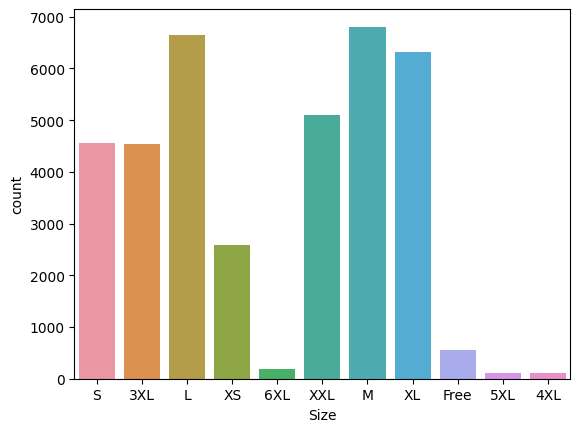

In [34]:
ax = sns.countplot(x='Size', data=df)

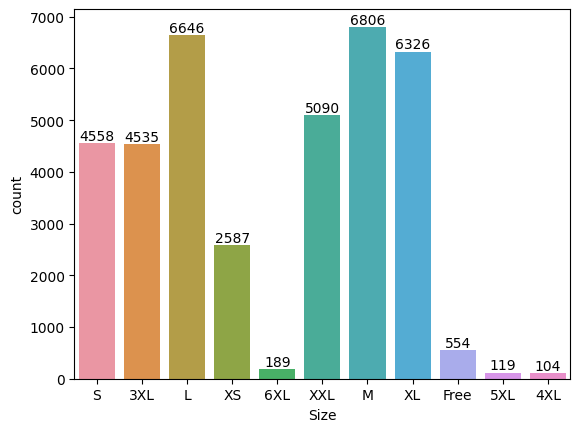

In [35]:
ax = sns.countplot(x='Size',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

* Note:- From above Graph you can see that most of the People buys M- Size

## 2. Group By

##### The groupby() Function in pandas is used to group data based on one or more columns in a Dataframe

Text(0.5, 1.0, 'Bar Graph for Size vs Quantity')

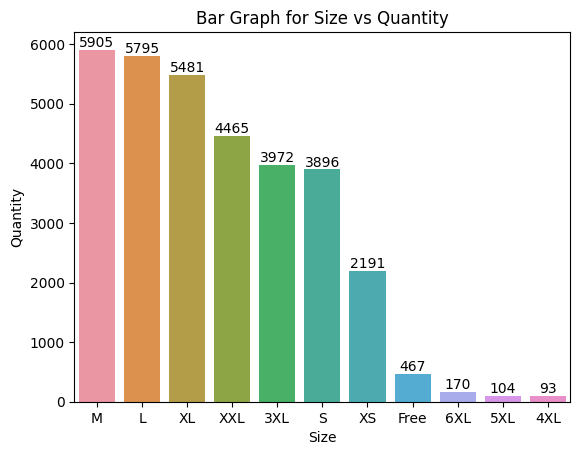

In [37]:
SQ = df.groupby('Size',as_index=False)['Quantity'].sum().sort_values('Quantity',ascending=False)

S_Q = sns.barplot(data=SQ,x='Size',y='Quantity')

for bars in S_Q.containers:
    S_Q.bar_label(bars)
plt.title('Bar Graph for Size vs Quantity')


* Note:- From above Graphs we can see that most of Quantity buys M-size in the Sales

## 3. Courier Status

<Axes: xlabel='Courier Status', ylabel='count'>

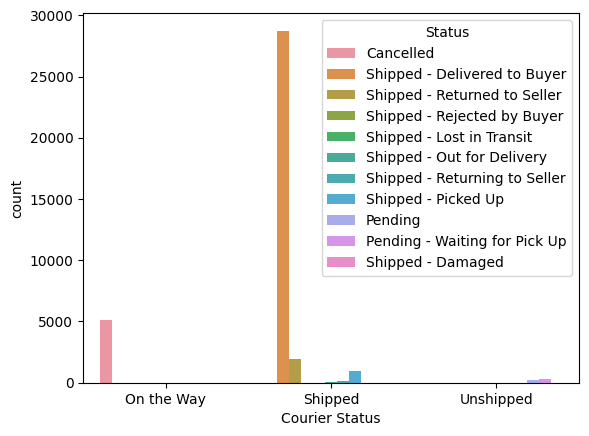

In [38]:
sns.countplot(data=df,x='Courier Status',hue='Status')

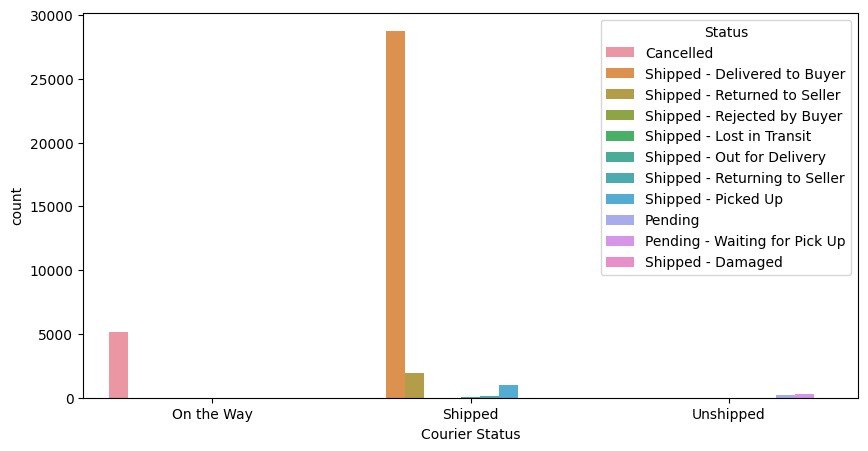

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Courier Status',hue='Status')
plt.show()

* Note:- From above Graph the majority of the Orders are shipped through the courier.

<Axes: >

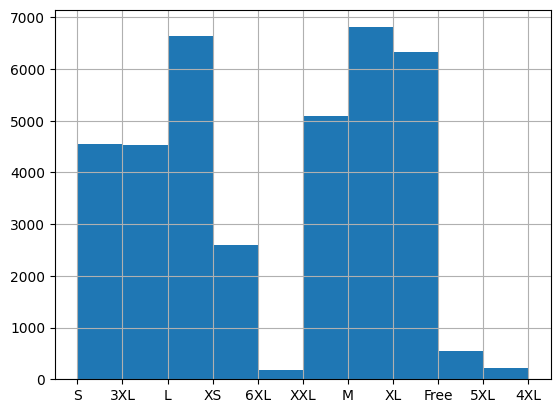

In [41]:
# Histogram
df['Size'].hist()

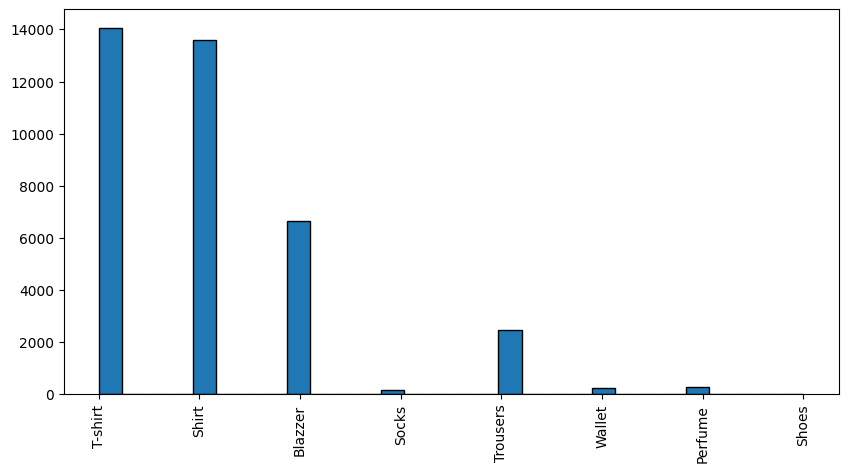

In [48]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data,bins=30,edgecolor='Black')
plt.xticks(rotation=90)
plt.show()


* Note:- From above Graphs most of the buyers of T-shirt

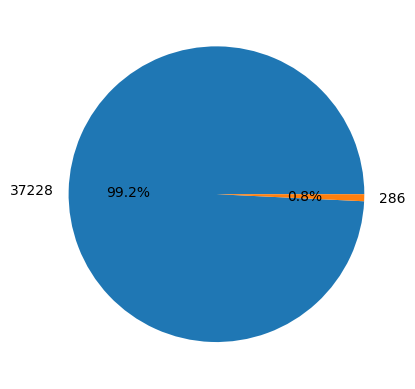

In [52]:
# Checking B2B Data  by using pie chart
B2B = df['B2B'].value_counts()

# Plot the pie chart
plt.pie(B2B,labels=B2B,autopct='%1.1f%%')
# plt.axis('equal')
plt.show()


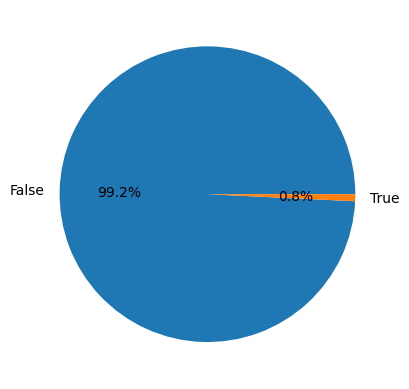

In [54]:
# Checking B2B Data by using pie Chart
B2B = df['B2B'].value_counts()

# Plot the pie chart
plt.pie(B2B,labels=B2B.index,autopct='%1.1f%%')

# Plt.axis('equal')
plt.show()

* Note:- From above Chart we can see thet maximum i.e 99.2% of buyers are retailers and 0.7% are B2B Buyers

## 4. Scatter Plot:-

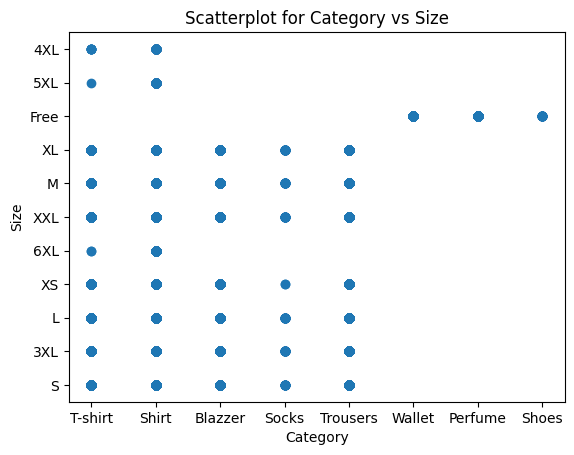

In [56]:
# Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']
# plot a scatterplot
plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatterplot for Category vs Size')
plt.show()

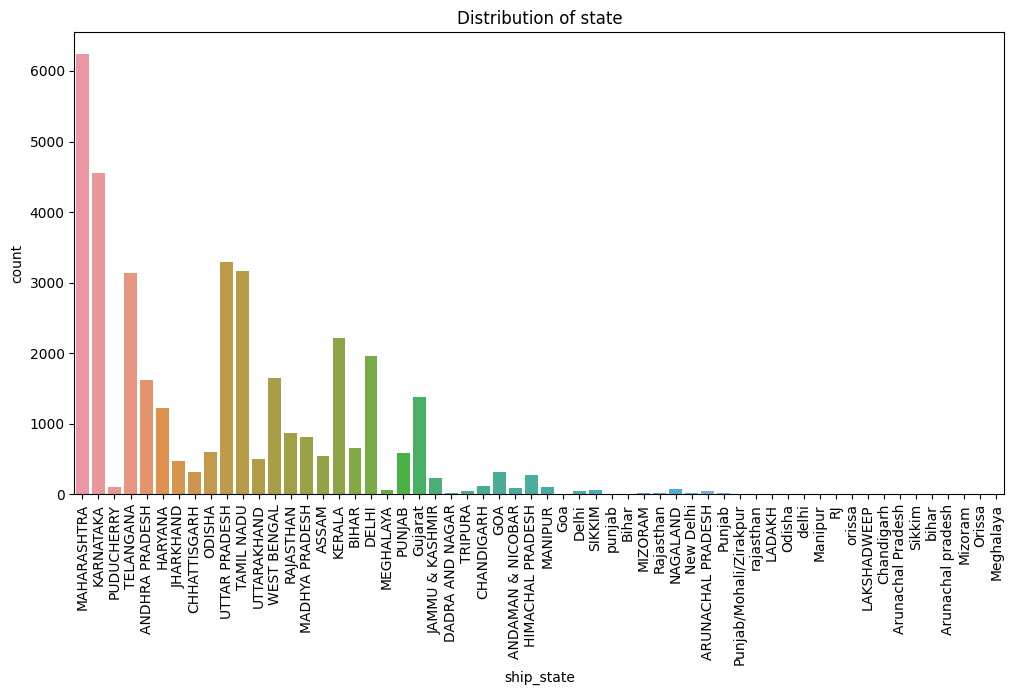

In [59]:
# plot count of cities by state
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='ship-state')
plt.xlabel('ship_state')
plt.ylabel('count')
plt.title('Distribution of state')
plt.xticks(rotation=90)
plt.show()

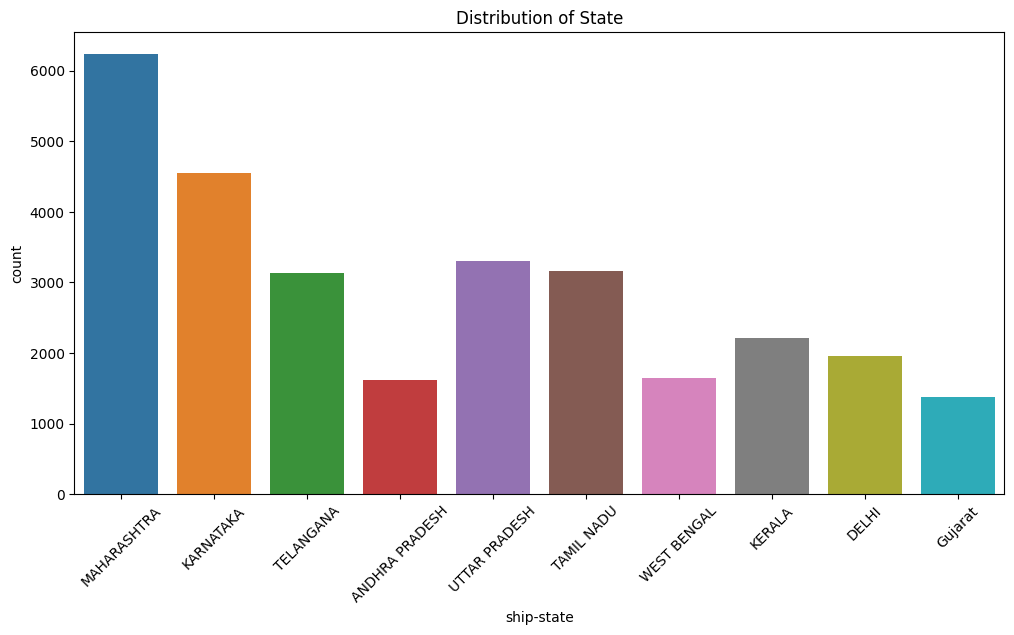

In [65]:
# top_10_States 
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)],x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=45)
plt.show()

* Note: From above Graph you can see that most of the buyers are from Maharashtra state

# Conclusion

#### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.
 

# By Mohit